<a href="https://colab.research.google.com/github/wvpssriraj10/PRODIGY_DS_04/blob/main/twitter_sentiment_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob vaderSentiment wordcloud matplotlib seaborn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Text']
df = df[['Entity', 'Sentiment', 'Text']]

In [ ]:
df.dropna(inplace=True)

In [ ]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_vader(text):
    return analyzer.polarity_scores(text)['compound']

In [ ]:
df['Polarity'] = df['Text'].apply(get_polarity)
df['VADER_Score'] = df['Text'].apply(get_sentiment_vader)
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_mapping)

<ipython-input-9-56c308ca3dde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette='coolwarm')


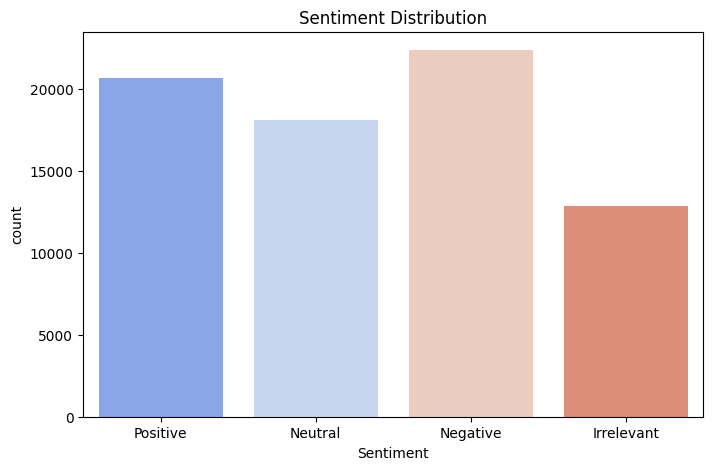

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

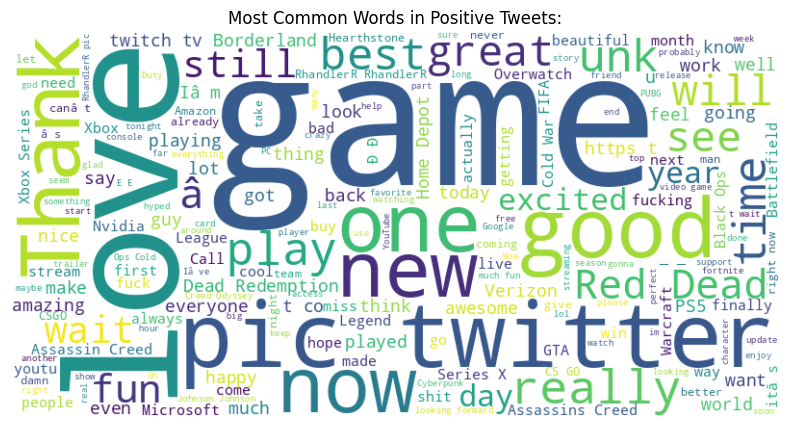

In [ ]:
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Tweets:')
plt.show()

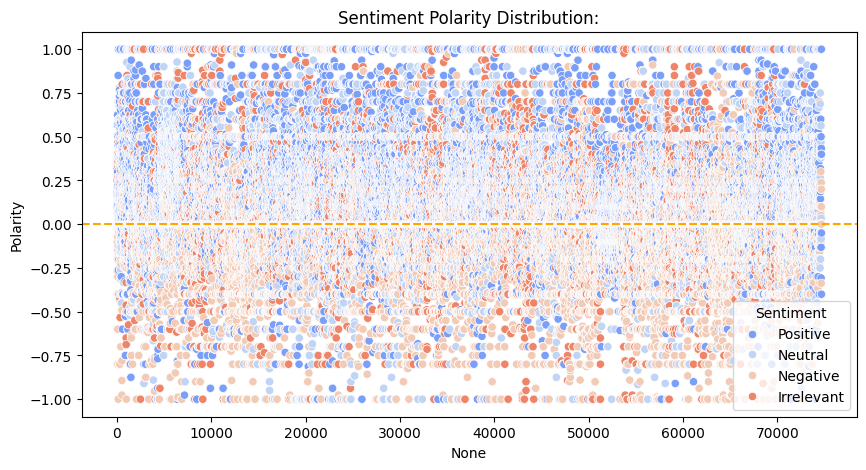

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['Polarity'], hue=df['Sentiment'], palette='coolwarm')
plt.axhline(0, color='Orange', linestyle='dashed')
plt.title('Sentiment Polarity Distribution:')
plt.show()